In [3]:
import tensorflow as tf
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
mpl.rcParams['figure.figsize']=(12,10)
colors=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
df=pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
print(df.shape)

(284807, 31)


In [45]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [16]:
df[['V1','V2','V3','V4','V5','V26','V27','V28']].describe()

,V1,V2,V3,V4,V5,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01


In [23]:
#neg(0),pos(1 is fraud)
neg,pos=np.bincount(df['Class'])
total=neg+pos
print('Total: {}\nPositive: {}({:.2f} of total)'
      .format(total,pos,(100*pos/total)))

Total: 284807
Positive: 492(0.17 of total)


In [ ]:
cleaned_df=df.copy()
cleaned_df.pop('Time')

In [26]:
eps=0.001
cleaned_df['Log Amount']=np.log(cleaned_df.pop('Amount')+eps)
cleaned_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


In [28]:
train_df,test_df=train_test_split(cleaned_df,test_size=0.2)
train_df,val_df=train_test_split(train_df,test_size=0.2)

train_labels=np.array(train_df.pop('Class'))
val_labels=np.array(val_df.pop('Class'))

train_features=np.array(train_df)
val_features=np.array(val_df)

In [29]:
print(train_features.shape)

(182276, 29)


In [30]:
train_features[0]

array([-0.17144757,  0.61261601,  0.51334206, -0.52232473, -0.17046059,
       -0.03844597, -0.20042385,  0.52901747,  0.5715404 , -1.0642258 ,
       -1.44598479,  0.49423166,  0.6591045 , -0.14338734, -0.00501194,
        0.30005191, -0.58049695,  0.39983153, -0.37919948, -0.22150112,
        0.29187539,  0.87245542, -0.05712901,  0.60561713, -0.22455755,
       -0.30907896, -0.04423038, -0.04633956,  2.30168469])

In [32]:
scaler=StandardScaler()
train_features=scaler.fit_transform(train_features)
val_features=scaler.transform(val_features)

train_features=np.clip(train_features,-5,5)
val_features=np.clip(val_features,-5,5)

print('Training features shape:',train_features.shape)
print('Training labels shape:',train_labels.shape)

print('Validation features shape:',val_features.shape)
print('Validation labels shape:',val_labels.shape)

Training features shape: (182276, 29)
Training labels shape: (182276,)
Validation features shape: (45569, 29)
Validation labels shape: (45569,)


In [112]:
test_labels=np.array(test_df.pop('Class'))
test_features=np.array(test_df)

test_features=scaler.transform(test_features)
test_features=np.clip(test_features, -5, 5)
print('Test features shape:',test_features.shape)

Test features shape: (56962, 29)


In [44]:
bool_train_labels=train_labels != 0
print(bool_train_labels)
print(bool_train_labels.shape)

[False False False ... False False False]
(182276,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


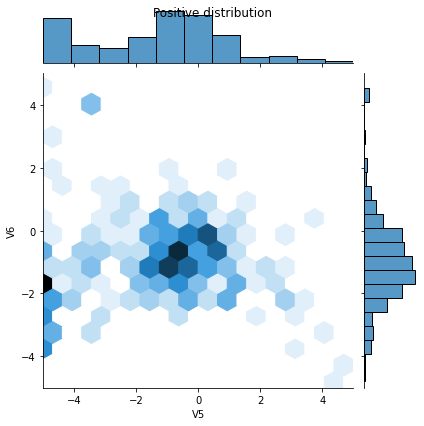

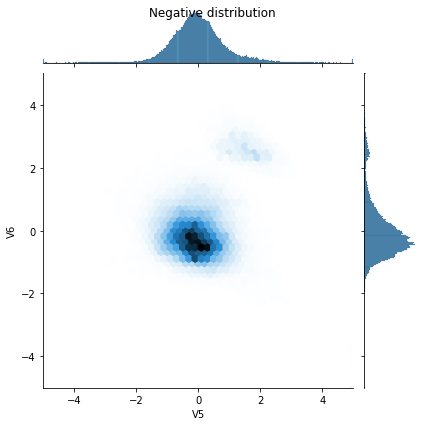

In [56]:
pos_df=pd.DataFrame(train_features[bool_train_labels],columns=train_df.columns)
neg_df=pd.DataFrame(train_features[~bool_train_labels],columns=train_df.columns)

sns.jointplot(pos_df['V5'],pos_df['V6'],
              kind='hex',xlim=(-5,5),ylim=(-5,5))
plt.suptitle('Positive distribution')

sns.jointplot(neg_df['V5'],neg_df['V6'],
              kind='hex',xlim = (-5,5),ylim = (-5,5))
_=plt.suptitle("Negative distribution")

In [66]:
METRICS=[
         tf.keras.metrics.TruePositives(name='tp'),
         tf.keras.metrics.FalsePositives(name='fp'),
         tf.keras.metrics.TrueNegatives(name='tn'),
         tf.keras.metrics.FalseNegatives(name='fn'),
         tf.keras.metrics.BinaryAccuracy(name='accuracy'),
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall'),
         tf.keras.metrics.AUC(name='auc'),]

def make_model(metrics=METRICS,output_bias=None):
  if output_bias is not None:
    output_bias=tf.keras.initializers.Constant(output_bias)
  model=tf.keras.Sequential([
      tf.keras.layers.Dense(16,activation='relu',
                            input_shape=(train_features.shape[-1],)),
       #tf.keras.layers.Dense(16,activation='relu'),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(1,activation='sigmoid',
                             bias_initializer=output_bias),])

  model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=metrics)
  return model

In [67]:
BATCH_SIZE=2048

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [68]:
model=make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.predict(train_features[110:120])

array([[0.22900203],
       [0.32391322],
       [0.38191056],
       [0.35611242],
       [0.81772196],
       [0.31009358],
       [0.20205027],
       [0.1952667 ],
       [0.12968361],
       [0.54867864]], dtype=float32)

In [75]:
results=model.evaluate(train_features,train_labels,batch_size=BATCH_SIZE,verbose=0)
print('loss:{:.4f}'.format(results[0]))

loss:0.4665


In [77]:
initial_bias=np.log([pos/neg])
initial_bias

array([-6.35935934])

In [79]:
model=make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.00148553],
       [0.00179914],
       [0.00363329],
       [0.00220242],
       [0.00884444],
       [0.00216579],
       [0.00574532],
       [0.00278094],
       [0.01459762],
       [0.00807545]], dtype=float32)

In [80]:
results=model.evaluate(train_features,train_labels,batch_size=BATCH_SIZE,verbose=0)
print('loss:{:.4f}'.format(results[0]))

loss:0.0137


In [84]:
initial_weights=os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [85]:
model=make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history=model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features,val_labels),
    verbose=0)

In [86]:
model=make_model()
model.load_weights(initial_weights)
careful_bias_history=model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features,val_labels),
    verbose=0)

In [92]:
def plot_loss(history,label):
  plt.semilogy(history.epoch,history.history['loss'],
               color='r',label='Train'+label)
  plt.semilogy(history.epoch,history.history['val_loss'],
               color='g',label='Val'+label,linestyle='--')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.legend()
   

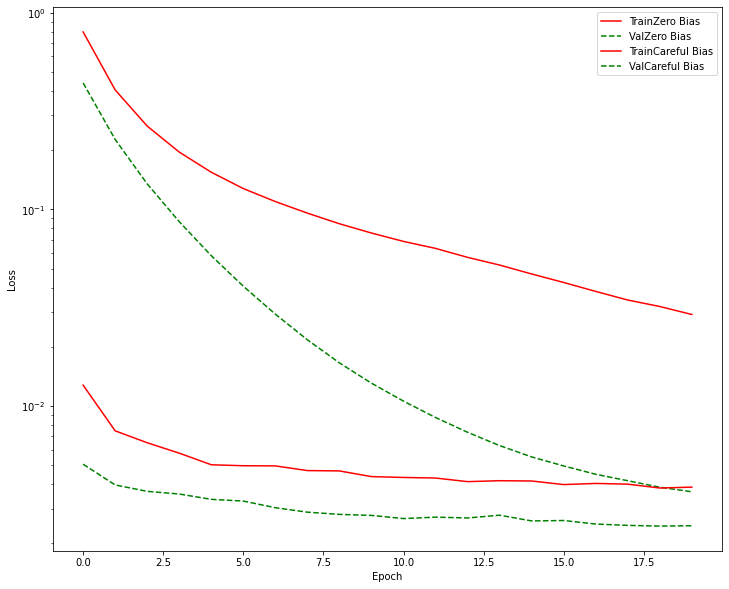

In [93]:
plot_loss(zero_bias_history,'Zero Bias')
plot_loss(careful_bias_history,'Careful Bias')

Train the model

In [96]:
model=make_model()
model.load_weights(initial_weights)
baseline_history=model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/50
90/90 [==============================] - 2s 18ms/step - loss: 0.0135 - tp: 114.0000 - fp: 217.0000 - tn: 227250.0000 - fn: 264.0000 - accuracy: 0.9979 - precision: 0.3444 - recall: 0.3016 - auc: 0.8144 - val_loss: 0.0053 - val_tp: 27.0000 - val_fp: 0.0000e+00 - val_tn: 45491.0000 - val_fn: 51.0000 - val_accuracy: 0.9989 - val_precision: 1.0000 - val_recall: 0.3462 - val_auc: 0.9601
Epoch 2/50
90/90 [==============================] - 1s 9ms/step - loss: 0.0076 - tp: 104.0000 - fp: 46.0000 - tn: 181930.0000 - fn: 196.0000 - accuracy: 0.9987 - precision: 0.6933 - recall: 0.3467 - auc: 0.8808 - val_loss: 0.0040 - val_tp: 51.0000 - val_fp: 10.0000 - val_tn: 45481.0000 - val_fn: 27.0000 - val_accuracy: 0.9992 - val_precision: 0.8361 - val_recall: 0.6538 - val_auc: 0.9611
Epoch 3/50
90/90 [==============================] - 1s 9ms/step - loss: 0.0062 - tp: 142.0000 - fp: 25.0000 - tn: 181951.0000 - fn: 158.0000 - accuracy: 0.9990 - precision: 0.8503 - recall: 0.4733 - auc: 0.8946 - 

In [103]:
def plot_metrics(history):
  metrics=['loss','auc','precision','recall']
  for n,metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,history.history[metric],color=colors[0],label='Train')
    plt.plot(history.epoch,history.history['val_'+metric],color=colors[0],
             linestyle='--',label='val')
    plt.xlabel('Epoch')
    plt.ylabel(metric) 
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

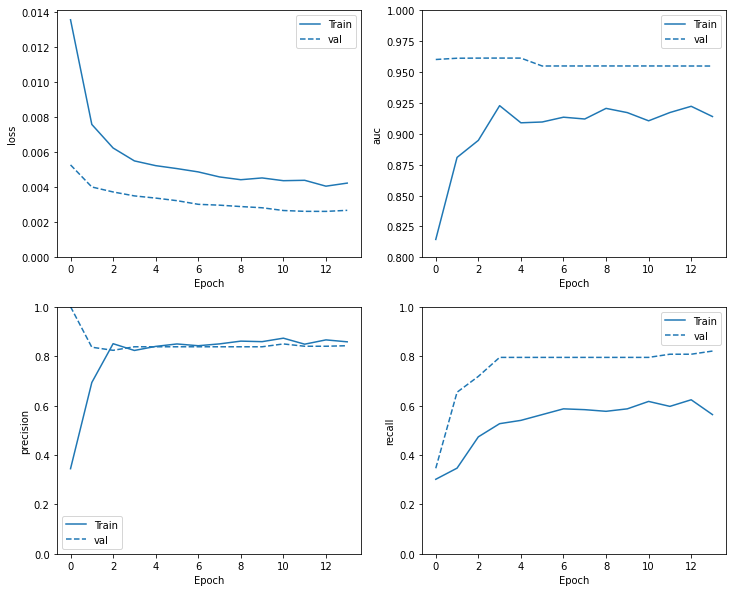

In [104]:
plot_metrics(baseline_history)

In [105]:
model.metrics_names

['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc']

In [110]:
len(baseline_history.history['val_precision'])

14

In [113]:
train_predictions_baseline=model.predict(train_features,batch_size=BATCH_SIZE)
test_predictions_baseline=model.predict(test_features, batch_size=BATCH_SIZE)

In [114]:
test_predictions_baseline

array([[0.00068164],
       [0.00065219],
       [0.00097844],
       ...,
       [0.00116736],
       [0.00127852],
       [0.00097597]], dtype=float32)

In [120]:
def plot_cm(labels,predictions,p=0.5):
  cm=confusion_matrix(labels,predictions>p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm,annot=True,fmt='d')
  plt.title('Confusion_matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transcations:',np.sum(cm[1]))

In [117]:
baseline_results=model.evaluate(test_features,test_labels,
                                batch_size=BATCH_SIZE,verbose=0)

for name,value in zip(model.metrics_names,baseline_results):
  print(name,':',value)

loss : 0.0045541501604020596
tp : 78.0
fp : 12.0
tn : 56836.0
fn : 36.0
accuracy : 0.9991573095321655
precision : 0.8666666746139526
recall : 0.6842105388641357
auc : 0.9337429404258728


Legitimate Transactions Detected (True Negatives):  56836
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  36
Fraudulent Transactions Detected (True Positives):  78
Total Fraudulent Transcations: 114


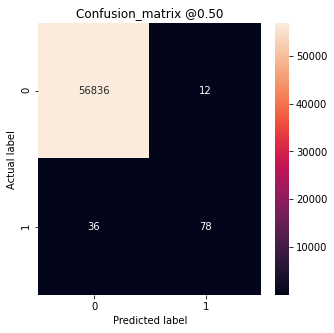

In [121]:
plot_cm(test_labels,test_predictions_baseline)

In [124]:
def plot_roc(name,labels,predictions,**kwargs):
  fp,tp,_=sklearn.metrics.roc_curve(labels,predictions)

  plt.plot(100*fp,100*tp,label=name,linewidth=2,**kwargs)
  plt.xlabel('False positives[%]')
  plt.ylabel('True positives[%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax=plt.gca()
  ax.set_aspect('equal')

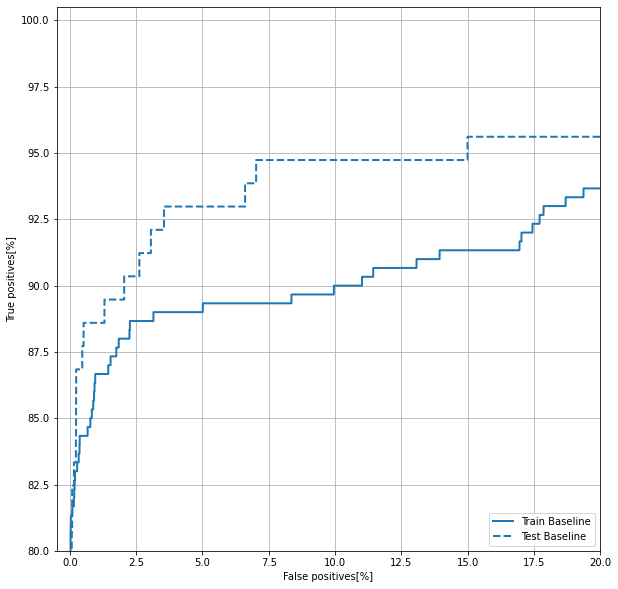

In [125]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

Class weights

In [133]:
#Scaling by total/2 helps keep the loss to a similar magnitude.
#The sum of the weights of all examples stays the same.
weight_for_0=((1/neg)*total)/2.0
weight_for_1=((1/pos)*total)/2.0

class_weight={0:weight_for_0,1:weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [137]:
#The sum of the weights of all examples stays the same(Very Important)
total_neg_weight=weights_for_0*neg
total_pos_weight=weights_for_1*pos
print('{:.1f}'.format(total_neg_weight))
print('{:.1f}'.format(total_pos_weight))

142403.5
142403.5


Train a model with class weights

In [141]:
weighted_model=make_model()
weighted_model.load_weights(initial_weights)

weighted_history=weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/50
90/90 [==============================] - 2s 17ms/step - loss: 1.3124 - tp: 181.0000 - fp: 700.0000 - tn: 238124.0000 - fn: 233.0000 - accuracy: 0.9961 - precision: 0.2054 - recall: 0.4372 - auc: 0.8586 - val_loss: 0.0124 - val_tp: 62.0000 - val_fp: 75.0000 - val_tn: 45416.0000 - val_fn: 16.0000 - val_accuracy: 0.9980 - val_precision: 0.4526 - val_recall: 0.7949 - val_auc: 0.9612
Epoch 2/50
90/90 [==============================] - 1s 9ms/step - loss: 0.7372 - tp: 176.0000 - fp: 1288.0000 - tn: 180688.0000 - fn: 124.0000 - accuracy: 0.9923 - precision: 0.1202 - recall: 0.5867 - auc: 0.8958 - val_loss: 0.0204 - val_tp: 68.0000 - val_fp: 139.0000 - val_tn: 45352.0000 - val_fn: 10.0000 - val_accuracy: 0.9967 - val_precision: 0.3285 - val_recall: 0.8718 - val_auc: 0.9623
Epoch 3/50
90/90 [==============================] - 1s 9ms/step - loss: 0.5230 - tp: 214.0000 - fp: 2139.0000 - tn: 179837.0000 - fn: 86.0000 - accuracy: 0.9878 - precision: 0.0909 - recall: 0.7133 - auc: 0.9217 -

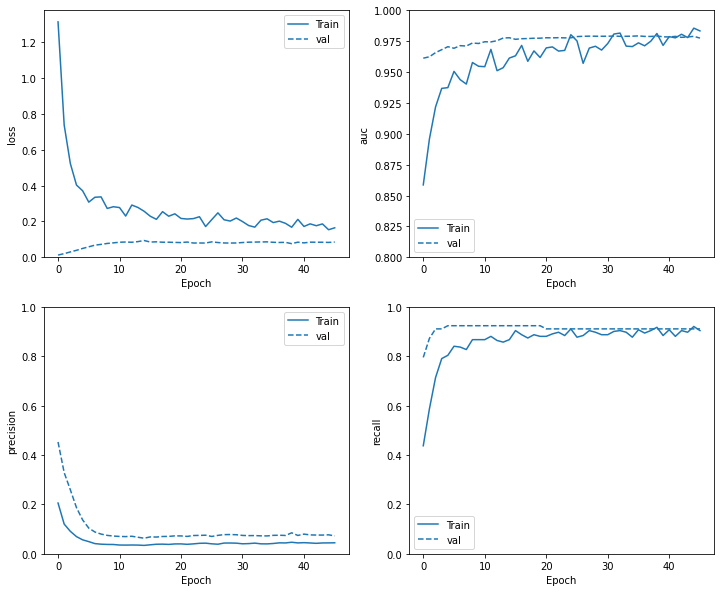

In [142]:
plot_metrics(weighted_history)

In [143]:
train_predictions_weighted=weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted=weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.08151800185441971
tp :  104.0
fp :  1053.0
tn :  55795.0
fn :  10.0
accuracy :  0.9813384413719177
precision :  0.08988764137029648
recall :  0.9122806787490845
auc :  0.9852619767189026

Legitimate Transactions Detected (True Negatives):  55795
Legitimate Transactions Incorrectly Detected (False Positives):  1053
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  104
Total Fraudulent Transcations: 114


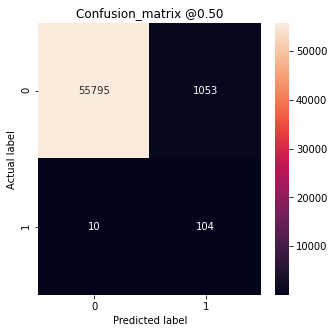

In [144]:
weighted_results=weighted_model.evaluate(test_features, test_labels,
                                          batch_size=BATCH_SIZE, verbose=0)
for name,value in zip(weighted_model.metrics_names,weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels,test_predictions_weighted)

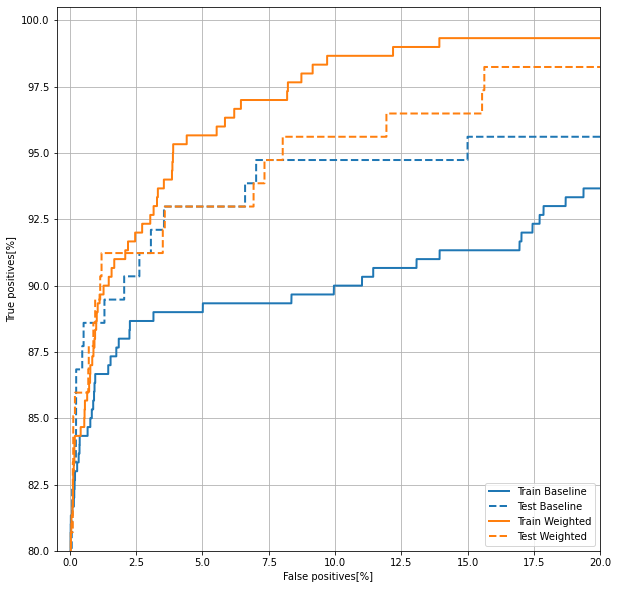

In [145]:
plot_roc("Train Baseline",train_labels,train_predictions  _baseline,color=colors[0])
plot_roc("Test Baseline",test_labels,test_predictions_baseline,color=colors[0],linestyle='--')

plot_roc("Train Weighted",train_labels,train_predictions_weighted,color=colors[1])
plot_roc("Test Weighted",test_labels,test_predictions_weighted,color=colors[1],linestyle='--')


plt.legend(loc='lower right')

Oversampling(Using tf.data)

In [146]:
pos_features=train_features[bool_train_labels]
neg_features=train_features[~bool_train_labels]

pos_labels=train_labels[bool_train_labels]
neg_labels=train_labels[~bool_train_labels]

In [147]:
BUFFER_SIZE=100000

def make_ds(features,labels):
  ds=tf.data.Dataset.from_tensor_slices((features,labels)).cache()
  ds=ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds=make_ds(pos_features,pos_labels)
neg_ds=make_ds(neg_features,neg_labels)

In [149]:
next(iter(pos_ds))

(<tf.Tensor: shape=(29,), dtype=float64, numpy=
 array([-5.        ,  5.        , -5.        ,  2.35374051, -3.48036877,
         4.31324847, -5.        , -5.        , -0.35850926, -4.677107  ,
         4.32713253, -4.64714676, -1.91839631, -5.        , -0.24686731,
        -5.        , -5.        , -3.7674508 ,  0.06476503, -4.58019274,
         5.        , -5.        ,  5.        , -1.05519877,  0.50668216,
        -0.22627502,  3.17761119,  2.9065532 , -1.4501031 ])>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

In [151]:
pos_ds

<RepeatDataset shapes: ((29,), ()), types: (tf.float64, tf.int64)>

In [156]:
resampled_ds=tf.data.experimental.sample_from_datasets([pos_ds,neg_ds],weights=[0.5,0.5])
resampled_ds=resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [157]:
next(iter(resampled_ds))

(<tf.Tensor: shape=(2048, 29), dtype=float64, numpy=
 array([[-0.63658007,  1.37742897, -1.13092242, ...,  1.16560925,
          0.77514217, -1.58540317],
        [-0.56909038, -1.00234086,  0.5969723 , ..., -0.84280514,
         -0.54747865,  1.63605668],
        [-0.38161278,  0.31717977,  0.95270715, ..., -0.12359814,
          0.32540563,  0.27953323],
        ...,
        [-4.36211809,  4.21486368, -5.        , ...,  2.92836971,
          0.71072236,  0.82236599],
        [-0.1375918 ,  0.37867143, -0.37059802, ...,  0.21366528,
          0.44454595,  0.22784423],
        [-0.44144221,  0.8279951 ,  0.60352704, ..., -0.13337228,
          0.22196976, -1.58540317]])>,
 <tf.Tensor: shape=(2048,), dtype=int64, numpy=array([1, 1, 0, ..., 1, 0, 0])>)

In [158]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5048828125


In [159]:
resampled_steps_per_epoch=np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [163]:
resampled_model=make_model()
resampled_model.load_weights(initial_weights)

output_layer=resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds=tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds=val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history=resampled_model.fit(
    resampled_ds,
    epochs=50,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/50
278/278 [==============================] - 7s 24ms/step - loss: 0.3986 - tp: 1897401.0000 - fp: 236672.0000 - tn: 1873835.0000 - fn: 153246.0000 - accuracy: 0.9063 - precision: 0.8891 - recall: 0.9253 - auc: 0.9743 - val_loss: 0.2489 - val_tp: 72.0000 - val_fp: 1593.0000 - val_tn: 43898.0000 - val_fn: 6.0000 - val_accuracy: 0.9649 - val_precision: 0.0432 - val_recall: 0.9231 - val_auc: 0.9779
Epoch 2/50
278/278 [==============================] - 6s 21ms/step - loss: 0.2062 - tp: 262024.0000 - fp: 20012.0000 - tn: 264832.0000 - fn: 22476.0000 - accuracy: 0.9254 - precision: 0.9290 - recall: 0.9210 - auc: 0.9752 - val_loss: 0.1385 - val_tp: 71.0000 - val_fp: 1169.0000 - val_tn: 44322.0000 - val_fn: 7.0000 - val_accuracy: 0.9742 - val_precision: 0.0573 - val_recall: 0.9103 - val_auc: 0.9644
Epoch 3/50
278/278 [==============================] - 6s 20ms/step - loss: 0.1613 - tp: 265527.0000 - fp: 12948.0000 - tn: 272089.0000 - fn: 18780.0000 - accuracy: 0.9443 - precision: 0.9535

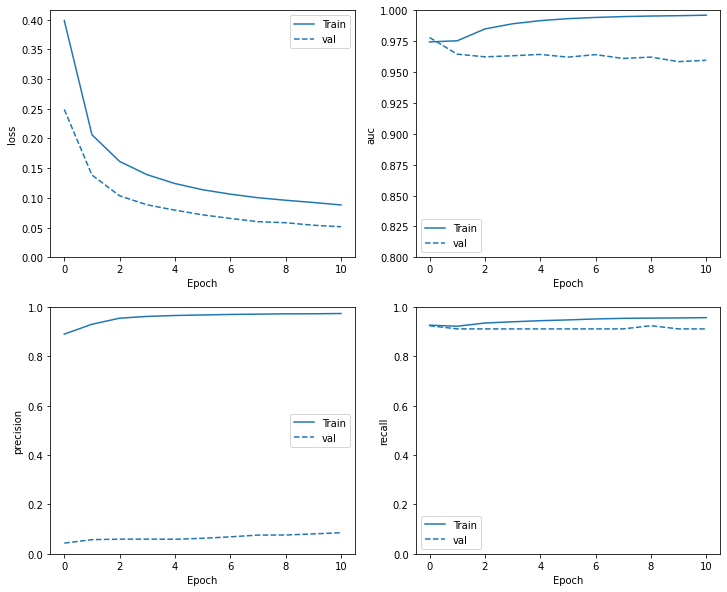

In [164]:
plot_metrics(resampled_history)

In [165]:
train_predictions_resampled=resampled_model.predict(train_features,batch_size=BATCH_SIZE)
test_predictions_resampled=resampled_model.predict(test_features,batch_size=BATCH_SIZE)

loss :  0.24787317216396332
tp :  103.0
fp :  1918.0
tn :  54930.0
fn :  11.0
accuracy :  0.9661353230476379
precision :  0.05096486955881119
recall :  0.9035087823867798
auc :  0.9792157411575317

Legitimate Transactions Detected (True Negatives):  54930
Legitimate Transactions Incorrectly Detected (False Positives):  1918
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  103
Total Fraudulent Transcations: 114


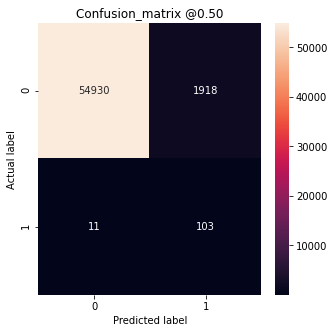

In [166]:
resampled_results=resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name,value in zip(resampled_model.metrics_names,resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels,test_predictions_resampled)